In [390]:
import os
import sys
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# Parse logs

In [368]:
q2 = open('./Q2/log.output_2018_03_16.txt', 'r').readlines()

hid_u = []
steps = []
learn_r = []
best_loss = []
unadj = []
adj = []

for l in q2:
    m = re.findall(r'(?<=Hidden units: )(\d+)', l)
    if len(m) > 0:
        hid_u.append(m[0])
    m = re.findall(r'(?<=Steps for back propagation: )(\d+)', l)
    if len(m) > 0:
        steps.append(m[0])
    m = re.findall(r'(?<=Initial learning rate set to )((\d.[^,])+)', l)
    if len(m) > 0:
        learn_r.append(m[0][0])
    m = re.findall(r'(?<=best observed loss was )(\d.\d{13})', l)
    if len(m) > 0:
        best_loss.append(m[0])
    m = re.findall(r'(?<=Unadjusted: )([\d.]+)', l)
    if len(m) > 0:
        if len(unadj) == 0:
            unadj.append(m[0])
        elif unadj[-1] != m[0]:
            unadj.append(m[0])
    m = re.findall(r'(?<=Adjusted for missing vocab: )([\d.]+)', l)
    if len(m) > 0:
        if len(adj) == 0:
            adj.append(m[0])
        elif adj[-1] != m[0]:
            adj.append(m[0])

q2 = { "hid_u": hid_u,
      "steps": steps,
      "learn_r": learn_r,
      "best_loss": best_loss,
      "unadj": unadj,
      "adj": adj
}

q2 = pd.DataFrame.from_dict(q2)
# q2.to_csv('q2.csv', index=False)

In [369]:
q3 = open('./Q3/log.output_np_2018_03_14.txt', 'r').readlines()

hid_u = []
steps = []
learn_r = []
best_loss = []
acc = []

for l in q3:
    m = re.findall(r'(?<=Hidden units: )(\d+)', l)
    if len(m) > 0:
        hid_u.append(m[0])
    m = re.findall(r'(?<=Steps for back propagation: )(\d+)', l)
    if len(m) > 0:
        steps.append(m[0])
    m = re.findall(r'(?<=Initial learning rate set to )((\d.[^,])+)', l)
    if len(m) > 0:
        learn_r.append(m[0][0])
    m = re.findall(r'(?<=best observed loss was )(\d.\d{13})', l)
    if len(m) > 0:
        best_loss.append(m[0])
    m = re.findall(r'(?<=acc )([\d.]+)', l)
    if len(m) > 0:
        acc.append(m[0])

q3 = { "hid_u": hid_u,
      "steps": steps,
      "learn_r": learn_r,
      "best_loss": best_loss,
      "acc": acc,
}

q3 = pd.DataFrame.from_dict(q3)
# q3.to_csv('q3.csv', index=False)

# t-SNE viz for Q4(b)

In [595]:
def viz(X, targets=None, perplexity=5):
    """
    Support code for drawing the plot.
    
    """

    X_tsne = TSNE(learning_rate=100, n_components=2, perplexity=perplexity, verbose=1).fit_transform(X)
    
    df = pd.DataFrame(X_tsne, columns=['PC1', 'PC2'])
    
    if targets is not None:
        df['Targets'] = pd.Series(targets, index=df.index)
        sns.pairplot(df, hue='Targets', markers='+', diag_kind='kde', size=5)
    else:
        sns.pairplot(df)
    plt.show()

#### Vizualize the activation of the hidden layer

The plot below visualize the activation of the hidden layer on the 1000 dev samples during evaluation of the *direct-np* task.

Weights are taken after training on the *direct-np* task with 50 hidden units, 2 lookback steps, 1.5 learn rate, 25 epochs and 5 annealing. 

*Direct-np* is an experiment how the model will perform if it's trained as a feedforward neural network, instead of RNN. That is, given a subject as a token, the model has to learn to predict whether the verb is inflected or uninflected (all other words from the sentence are stripped during training). What is interesting is that during evaluation, the model can handle more complex input: we present all words up until the verb and still achieve a respectable best accuracy of 0.791 and best observed loss was 0.46458921258620667 at epoch 2.

As we can expect, the plots show that the data isn't entirely separable (linearly or otherwise) but we see discernable clusters. We used t-SNE to reduce the dimensionality from 50 hidden units to two 'principle components,' i.e. from (2000,50) to (2000,2).

In [593]:
a_hidd = np.load('./Q4(b)/direct activations_hidd_layer.npy')
targets = np.load('./Q4(b)/targets.npy').flatten()
targets[targets == 0] = 'VBZ'
targets[targets == 1] = 'VBP'

[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.003s...
[t-SNE] Computed neighbors for 1000 samples in 0.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.177697
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.288937
[t-SNE] Error after 1000 iterations: 0.802620


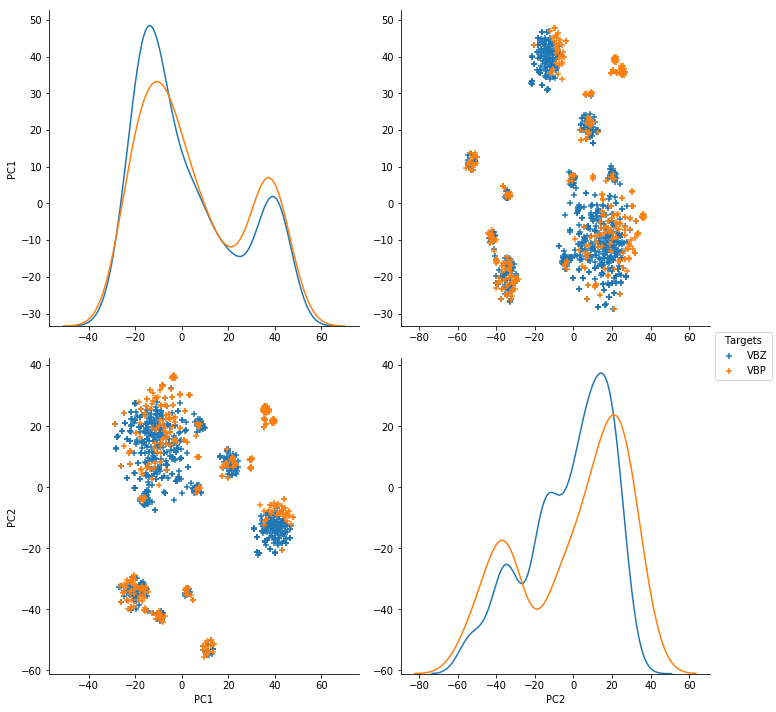

In [594]:
viz(a_hidd, targets=targets, perplexity=32)

In [586]:
# U = np.load('./Q2/rnn.U (50 hidd, 2 steps, 1.5 learn rate).npy')
# viz(U, type='TSNE')

# ### ### ### ### ### ### ### ###

# U = np.load('./Q4(b)/rnn.U direct (50 hidd, 2 steps, 1.5 learn_r, 25 epochs).npy')
# viz(U, type="TSNE")

# ### ### ### ### ### ### ### ###

# U = np.load('./Q4(b)/rnn.U difficult (50 hidd, 10 steps, 1.5 learn_r, 25 epochs, diff 5).npy')
# viz(U, type='TSNE')

# ### ### ### ### ### ### ### ### 

# V = np.load('./Q4(b)/rnn.V direct (50 hidd, 2 steps, 1.5 learn_r, 25 epochs).npy')
# U = np.load('./Q4(b)/rnn.U direct (50 hidd, 2 steps, 1.5 learn_r, 25 epochs).npy')
# W = np.load('./Q4(b)/rnn.W direct (50 hidd, 2 steps, 1.5 learn_r, 25 epochs).npy')
# viz(V.T.dot(U).T.dot(W), type='TSNE')